<a href="https://colab.research.google.com/github/pafonsoDS/PyEVM/blob/master/ML_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project 💻

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

In [ ]:
# generating dataset and misc


X_train, y_train = datasets.make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

def plot_classifier_boundary(model, X, y, ax):
    """ Plots the decision boundary for any sklearn classifier for a 2 class problem."""

    cmap_light = mpl.colors.ListedColormap(['lightsteelblue', 'peachpuff'])

    # generate a grid with step h
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.05),
        np.arange(y_min, y_max, 0.05)
    )

    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.set_xlim((x_min,x_max))
    ax.set_ylim((y_min,y_max))

    cmap = mpl.colors.ListedColormap(['blue', 'orange'])
    ax.scatter(X[:,0], X[:,1], color=cmap(y), alpha=0.7)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.show()

    # cmap = mpl.colors.ListedColormap(['blue', 'orange'])
    # ax.scatter(X, y, c = cmap)


def plot_2d(X,y):
  cmap = mpl.colors.ListedColormap(['blue', 'orange'])

  plt.scatter(X[:, 0], X[:, 1], c=cmap(y), alpha=0.5)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.grid()
  plt.show()


In [ ]:
help(datasets.make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

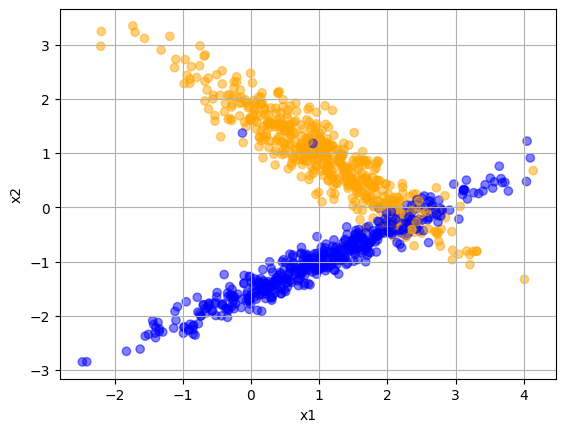

In [ ]:
plot_2d(X_train, y_train)

In [ ]:
#investigating method assumptions

def cv_mine(model, X, y, k):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold)
    accuracy = np.mean(scores)
    std = np.std(scores)
    print("Accuracy: {:.2f}, Standard Deviation: {:.2f}".format(accuracy, std))


In [ ]:
# LDA

In [ ]:
# QDA

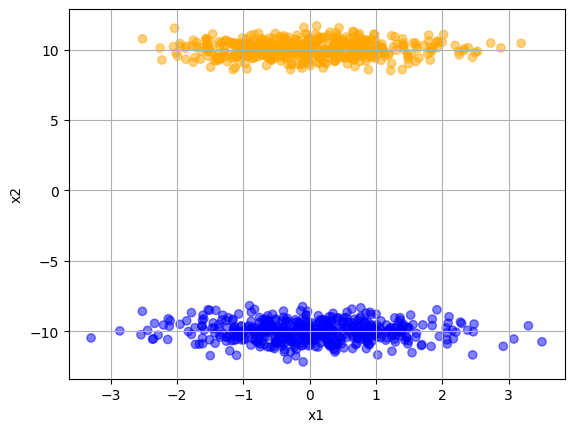

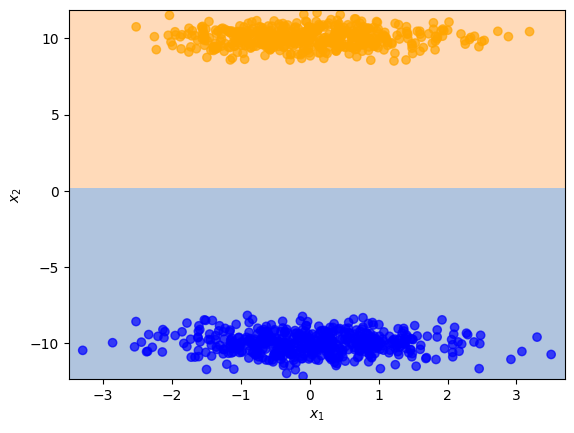

In [ ]:
# Unpruned Decision Tree (UDT)

X_trivial, y_trivial = datasets.make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=83,
    class_sep = 10
)

plot_2d(X_trivial, y_trivial)

UDT = DTC().fit(X_trivial, y_trivial)

ax = plt.axes()
plot_classifier_boundary(UDT, X_trivial, y_trivial, ax)

#####################################################################

In [ ]:
help(make_moons)

Help on function make_moons in module sklearn.datasets._samples_generator:

make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles.
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, the total number of points generated.
        If two-element tuple, number of points in each of two moons.
    
        .. versionchanged:: 0.23
           Added two-element tuple.
    
    shuffle : bool, default=True
        Whether to shuffle the samples.
    
    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible o

[[ 8.64395519e-01 -2.64509343e-01]
 [ 2.45115375e+00 -1.17549859e-01]
 [-3.50712335e-01  4.49211054e-01]
 [ 7.41295508e-01  4.32918827e-01]
 [ 1.18875554e+00 -5.18301281e-01]
 [ 1.00058840e+00 -3.14414711e-01]
 [ 3.21492251e-01 -1.30559756e-01]
 [-4.03548900e-01  6.61359843e-01]
 [ 7.62936531e-01 -2.30139250e-02]
 [ 3.13264293e-01  2.00795238e-02]
 [ 1.41803455e+00 -2.47352113e-02]
 [ 4.18401771e-01  7.30461845e-01]
 [ 1.12773515e+00 -4.77783214e-01]
 [ 8.00767998e-01  1.07926837e+00]
 [-2.06436217e-02  2.20834590e-01]
 [ 1.15255165e+00 -6.48254419e-01]
 [ 2.05396667e+00  3.55015470e-01]
 [ 7.25170092e-01 -2.41784045e-01]
 [-6.40438648e-01  2.29095455e-02]
 [ 3.82317477e-01  4.36029090e-01]
 [-1.56547995e-02  1.04132356e+00]
 [-1.01363665e+00  3.13035015e-01]
 [ 1.53515683e+00 -5.83500301e-01]
 [ 1.50221432e+00 -4.92577596e-01]
 [-1.02978033e+00  9.02044871e-01]
 [ 5.29231105e-01  7.94312609e-01]
 [ 1.70556204e+00  4.58198500e-02]
 [ 2.38654069e+00  4.47899638e-01]
 [ 1.48265970e-01  3

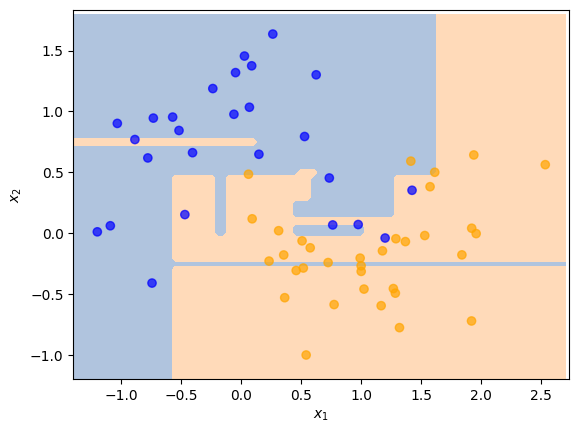

----------------------------

Two-depth Decision Tree Classifier:
Accuracy: 0.80, Standard Deviation: 0.16


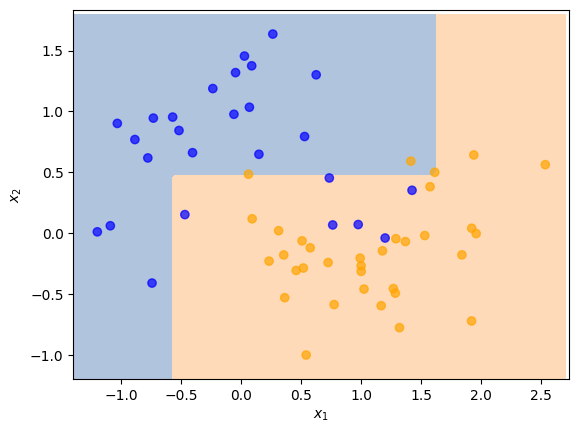


Linear Discriminant Analysis:
Accuracy: 0.87, Standard Deviation: 0.12


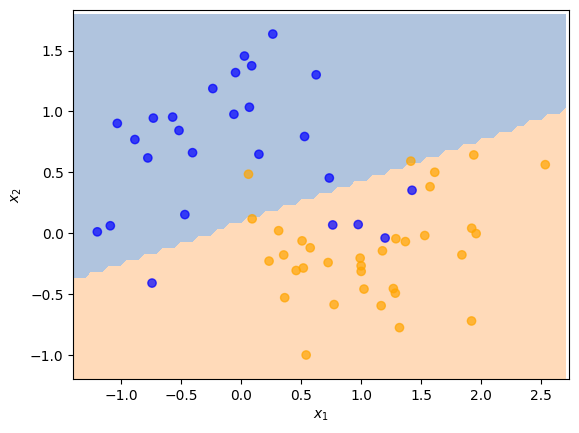


Quadratic Discriminant Analysis:
Accuracy: 0.90, Standard Deviation: 0.13


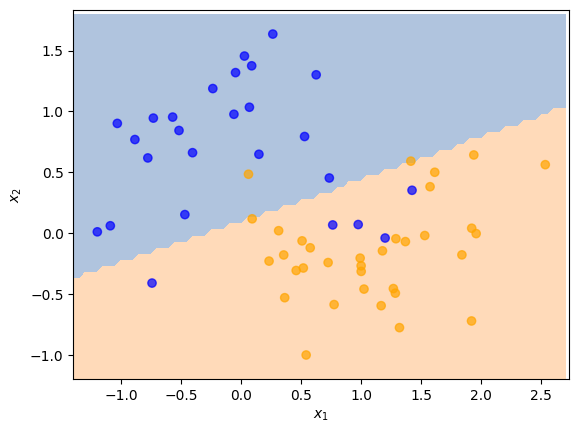


Support Vector Machine:
Accuracy: 0.90, Standard Deviation: 0.13


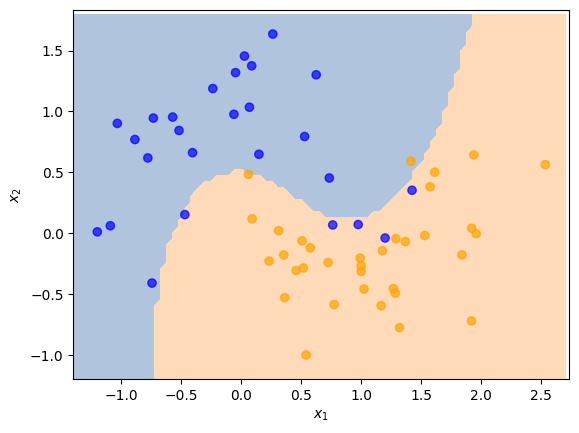

In [ ]:
# X_udt, y_udt = datasets.make_classification(
#     n_samples=100,
#     n_features=2,
#     n_informative=1,
#     n_redundant=0,
#     n_classes=2,
#     n_clusters_per_class=1,
#     random_state=83,
# )
X_udt, y_udt = make_moons(n_samples=300, noise=0.25, random_state=42)

print(X_udt)
print(y_udt)

UDT = DTC(random_state=42)
TDT = DTC(max_depth=2)  # Decision Tree with max depth of 2
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
SVM = SVC()


X_udt, y_udt = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split data into training and testing sets
X_udt, X_testU, y_udt, y_testU = train_test_split(X_udt, y_udt, test_size=0.2, random_state=42)
# Fit models to the data
UDT.fit(X_udt, y_udt)
TDT.fit(X_udt, y_udt)
LDA.fit(X_udt, y_udt)
QDA.fit(X_udt, y_udt)
SVM.fit(X_udt, y_udt)


# Call your custom cross-validation function for each model
print("Unpruned Decision Tree Classifier:")
cv_mine(UDT, X_testU, y_testU, 10)
ax1 = plt.axes()
plot_classifier_boundary(UDT, X_testU, y_testU, ax1)
plt.show()
print("----------------------------")

print("\nTwo-depth Decision Tree Classifier:")
cv_mine(TDT, X_testU, y_testU, 10)
ax2 = plt.axes()
plot_classifier_boundary(TDT, X_testU, y_testU, ax2)
plt.show()
print("\nLinear Discriminant Analysis:")
cv_mine(LDA, X_testU, y_testU, 10)
ax3 = plt.axes()
plot_classifier_boundary(LDA, X_testU, y_testU, ax3)
plt.show()
print("\nQuadratic Discriminant Analysis:")
cv_mine(QDA, X_testU, y_testU, 10)
ax4 = plt.axes()
plot_classifier_boundary(QDA, X_testU, y_testU, ax4)
plt.show()
print("\nSupport Vector Machine:")
cv_mine(SVM, X_testU, y_testU, 10)
ax5 = plt.axes()
plot_classifier_boundary(SVM, X_testU, y_testU, ax5)
plt.show()


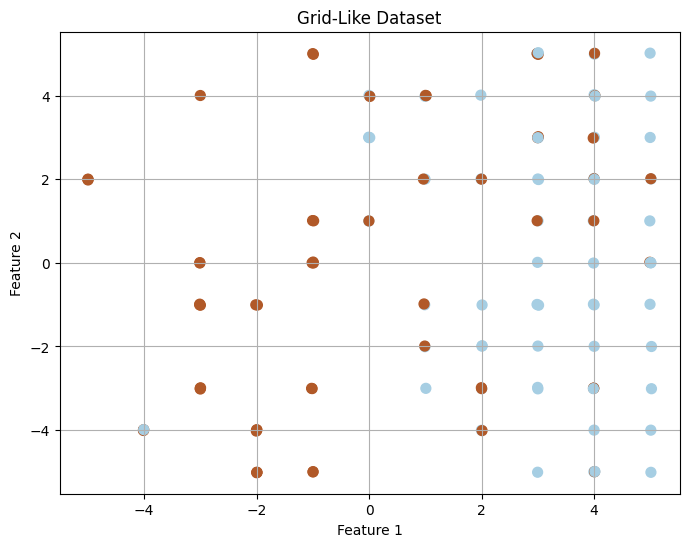

Unpruned Decision Tree Classifier:
Accuracy: 0.70, Standard Deviation: 0.31


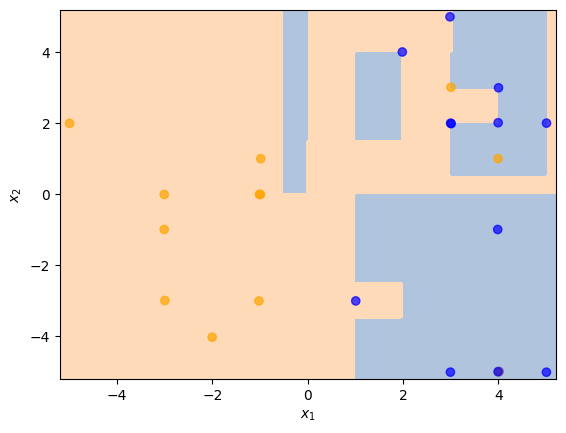

----------------------------

Two-depth Decision Tree Classifier:
Accuracy: 0.71, Standard Deviation: 0.14


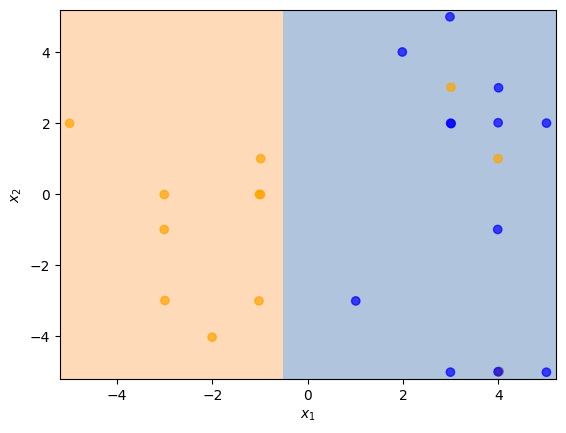


Linear Discriminant Analysis:
Accuracy: 0.73, Standard Deviation: 0.16


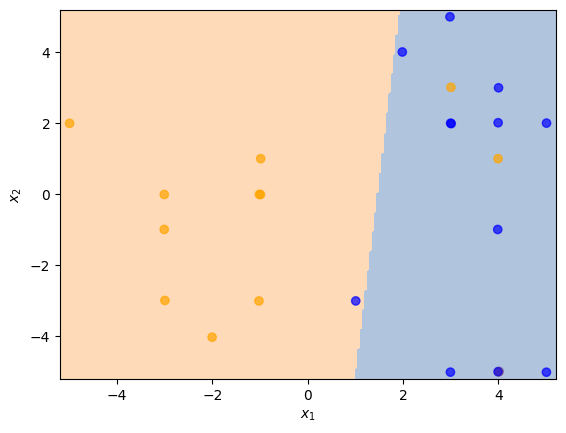


Quadratic Discriminant Analysis:
Accuracy: 0.72, Standard Deviation: 0.12


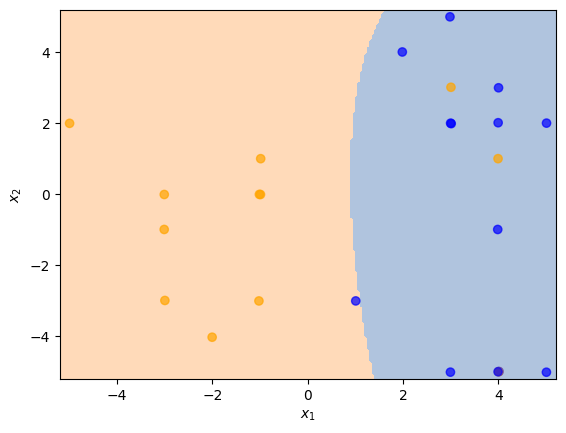


Support Vector Machine:
Accuracy: 0.70, Standard Deviation: 0.12


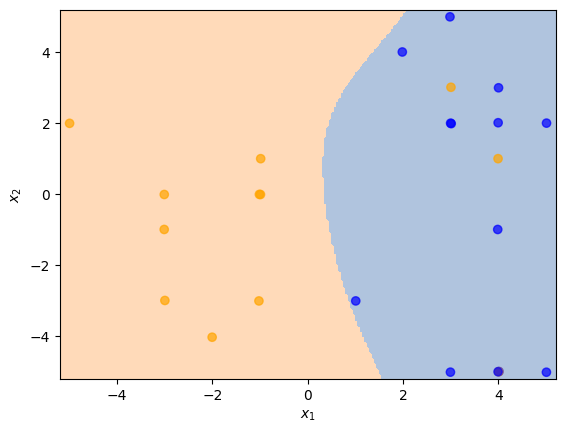

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate grid-like dataset
# def generate_grid_dataset(num_points_per_class=1000, noise_std=0.01, outlier_fraction=0.01):
#     # Generate grid points
#     grid_size = 5
#     grid_spacing = 1.0
#     grid_points = []
#     for i in range(-grid_size, grid_size + 1):
#         for j in range(-grid_size, grid_size + 1):
#             grid_points.append([i * grid_spacing, j * grid_spacing])
#     grid_points = np.array(grid_points)

#     # Assign class labels alternating between 0 and 1
#     labels = np.zeros(len(grid_points))
#     labels[::2] = 1

#     # Add noise to the grid points
#     noisy_grid_points = grid_points + np.random.normal(scale=noise_std, size=grid_points.shape)

#     # Add outliers
#     num_outliers = int(len(grid_points) * outlier_fraction)
#     outlier_indices = np.random.choice(len(grid_points), size=num_outliers, replace=False)
#     noisy_grid_points[outlier_indices] += np.random.normal(scale=noise_std, size=(num_outliers, 2))

#     # Combine points and labels
#     data = np.hstack((noisy_grid_points, labels[:, np.newaxis]))

#     return data

def generate_grid_dataset(num_points_per_class=10000, noise_std=0.01, outlier_fraction=0.01):
    # Generate grid points
    grid_size = 5
    grid_spacing = 1.0
    grid_points = []
    for i in range(-grid_size, grid_size + 1):
        for j in range(-grid_size, grid_size + 1):
            grid_points.append([i * grid_spacing, j * grid_spacing])
    grid_points = np.array(grid_points)

    # Assign class labels alternating between 0 and 1
    num_grid_points = len(grid_points)
    labels = np.zeros(num_grid_points)
    labels[:num_grid_points // 2] = 1  # Alternating labels

    # Shuffle grid points and labels together
    combined = list(zip(grid_points, labels))
    np.random.shuffle(combined)
    grid_points[:], labels[:] = zip(*combined)

    # Trim to desired number of points per class
    grid_points = grid_points[:num_points_per_class * 2]
    labels = labels[:num_points_per_class * 2]

    # Add noise to the grid points
    noisy_grid_points = grid_points + np.random.normal(scale=noise_std, size=grid_points.shape)

    # Add outliers
    num_outliers = int(len(grid_points) * outlier_fraction)
    outlier_indices = np.random.choice(len(grid_points), size=num_outliers, replace=False)
    noisy_grid_points[outlier_indices] += np.random.normal(scale=noise_std, size=(num_outliers, 2))

    # Combine points and labels
    data = np.hstack((noisy_grid_points, labels[:, np.newaxis]))

    return data

# Generate dataset
data = generate_grid_dataset()

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap=plt.cm.Paired, s=50)
plt.title('Grid-Like Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

#################################################################################

X1_udt = data[:, 0]
X2_udt = data[:, 1]

X_udt = np.hstack((X1_udt[:, np.newaxis], X2_udt[:, np.newaxis]))

y_udt = data[:, 2]

UDT = DTC(random_state=42)
TDT = DTC(max_depth=2)  # Decision Tree with max depth of 2
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
SVM = SVC()

# Split data into training and testing sets
X_udt, X_testU, y_udt, y_testU = train_test_split(X_udt, y_udt, test_size=0.2, random_state=42)
# Fit models to the data
UDT.fit(X_udt, y_udt)
TDT.fit(X_udt, y_udt)
LDA.fit(X_udt, y_udt)
QDA.fit(X_udt, y_udt)
SVM.fit(X_udt, y_udt)


# Call your custom cross-validation function for each model
print("Unpruned Decision Tree Classifier:")
cv_mine(UDT, X_testU, y_testU, 10)
ax1 = plt.axes()
plot_classifier_boundary(UDT, X_testU, y_testU, ax1)
plt.show()
print("----------------------------")

print("\nTwo-depth Decision Tree Classifier:")
cv_mine(TDT, X_udt, y_udt, 10)
ax2 = plt.axes()
plot_classifier_boundary(TDT, X_testU, y_testU, ax2)
plt.show()
print("\nLinear Discriminant Analysis:")
cv_mine(LDA, X_udt, y_udt, 10)
ax3 = plt.axes()
plot_classifier_boundary(LDA, X_testU, y_testU, ax3)
plt.show()
print("\nQuadratic Discriminant Analysis:")
cv_mine(QDA, X_udt, y_udt, 10)
ax4 = plt.axes()
plot_classifier_boundary(QDA, X_testU, y_testU, ax4)
plt.show()
print("\nSupport Vector Machine:")
cv_mine(SVM, X_udt, y_udt, 10)
ax5 = plt.axes()
plot_classifier_boundary(SVM, X_testU, y_testU, ax5)
plt.show()


In [ ]:
# Depth 2 Decision Tree

In [ ]:
# Bias Variance and Model Capacity

In [ ]:
#ensemble shenanigans